**Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax

In [ ]:
data = pd.read_csv("data_for_lr.csv")

In [ ]:
data.head(10)

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
5,36.0,32.463875
6,12.0,10.780897
7,81.0,80.763399
8,25.0,24.612151
9,5.0,6.963319


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [ ]:
data.isnull()

,x,y
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
695,False,False
696,False,False
697,False,False
698,False,False


In [ ]:
data.isnull().sum()

x    0
y    1
dtype: int64

**Data Processing**

In [ ]:
data = data.dropna()
print("Shape of the data: ",data.shape)

Shape of the data:  (699, 2)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 699 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       699 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 16.4 KB


**Splitting data**

In [ ]:
# Training Input and Output
training_input  = np.array(data.x[0:500]).reshape(500,1)
training_output  = np.array(data.x[0:500]).reshape(500,1)

#Validation data input and output
val_input = np.array(data.x[500:700]).reshape(199,1)
val_output = np.array(data.x[500:700]).reshape(199,1)

In [ ]:
print(f"training data shape = {training_input.shape}")
print(f"validation data shape = {val_input.shape}")

training data shape = (500, 1)
validation data shape = (199, 1)


## **<font color = "green">Linear Regression</font>**



<h3><b>Forward Propagation</b></h3>




f(x) = m*x + c

In [ ]:
def forward_propagation(training_input, parameters):
  m = parameters['m']
  c = parameters['c']

  predictions = np.multiply(m, training_input) + c

  return predictions

<h3><b>Cost Function</b></h3>




summation(1/2n *(y-f(x))^2)

In [ ]:
def cost_function(predictions, training_output):
  cost  = (np.mean(training_output - predictions) **2) *0.5
  return cost

<h3><b>Gradient Descent for Backpropagation</b></h3>




df = sum(f(x)-y)/n <br>
dm = df * x<br>
dc = df * 1

In [ ]:
def backward_propagation(training_input,training_output,predictions):
  derivatives = dict()
  df = predictions-training_output
  dm = np.mean(np.multiply(df,training_input))
  dc = np.mean(df)

  derivatives['dm'] = dm
  derivatives['dc'] = dc

  return derivatives

<h3><b>Update Parameters</b></h3>




m = m - (learning_rate * dm) <br>
c = c - (learning_rate * dc)

In [ ]:
def update_parameters(parameters,derivatives,learning_rate):
  parameters['m'] = parameters['m'] - learning_rate * derivatives['dm']
  parameters['c'] = parameters['c'] - learning_rate * derivatives['dc']

  return parameters

<h3><b>Model Training</b></h3>




In [ ]:
def train(training_input, training_output, learning_rate,iters):

  #random parameters
  parameters= dict()
  parameters['m'] = np.random.uniform(0,1)
  parameters['c'] = np.random.uniform(0,1)

  plt.figure()

  #loss
  loss = list()
  #iteration
  for i in range(iters):

    #forwared propagation
    predictions = forward_propagation(training_input,parameters)

    #cost
    cost = cost_function(predictions,training_output)

    loss.append(cost)
    print(f"Iteration = {i+1}, Loss = {cost}")

    #plot
    fig,ax = plt.subplots()

    ax.plot(training_input,training_output, "+", label = "Original")
    ax.plot(training_input,predictions, "*", label = "Training")

    legend = ax.legend()

    plt.plot(training_input, training_output, "+", label="Original")
    plt.plot(training_input, predictions, "*", label="Training")


    #backpropagation
    derivatives = backward_propagation(training_input,training_output, predictions)

    #update the parameters
    parameters = update_parameters(parameters, derivatives, learning_rate)

  return parameters,loss


<h3><b>Training</b></h3>




Iteration = 1, Loss = 924.0624012350404
Iteration = 2, Loss = 417.88263317920473
Iteration = 3, Loss = 188.67593479244948
Iteration = 4, Loss = 84.98610113867484
Iteration = 5, Loss = 38.14498544320282
Iteration = 6, Loss = 17.02990288000343
Iteration = 7, Loss = 7.542097851482414
Iteration = 8, Loss = 3.299525748200231
Iteration = 9, Loss = 1.4164639041801965
Iteration = 10, Loss = 0.5902697549910492
Iteration = 11, Loss = 0.23438715858924664
Iteration = 12, Loss = 0.08569512040495834
Iteration = 13, Loss = 0.02683614208723789
Iteration = 14, Loss = 0.005926111600175364
Iteration = 15, Loss = 0.00034193756333162685
Iteration = 16, Loss = 0.0004370066147553473
Iteration = 17, Loss = 0.002250566238169085
Iteration = 18, Loss = 0.004265768696599758
Iteration = 19, Loss = 0.005983115368161186
Iteration = 20, Loss = 0.007303081167761044


<ipython-input-34-d3d618c7c60b>:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig,ax = plt.subplots()


<Figure size 640x480 with 0 Axes>

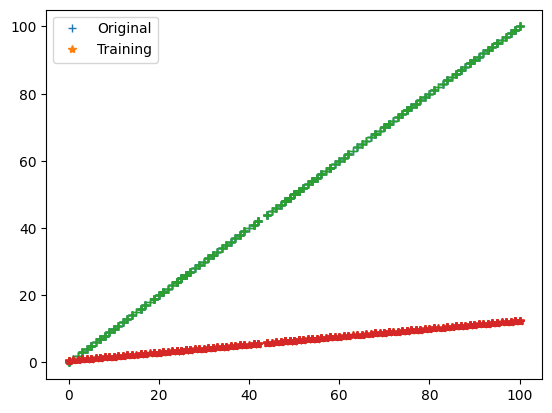

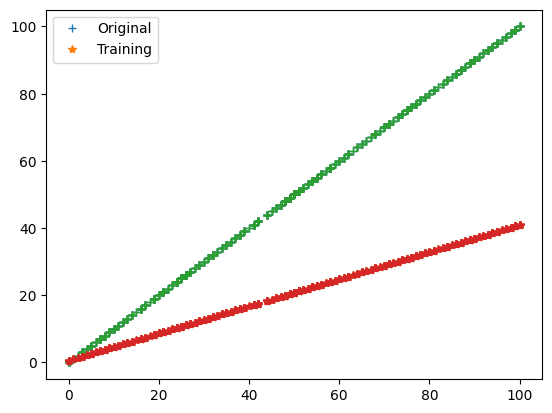

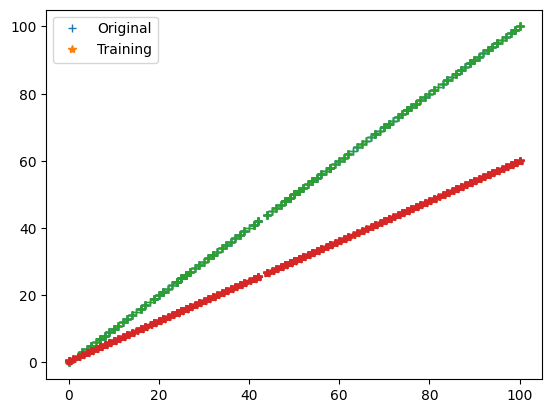

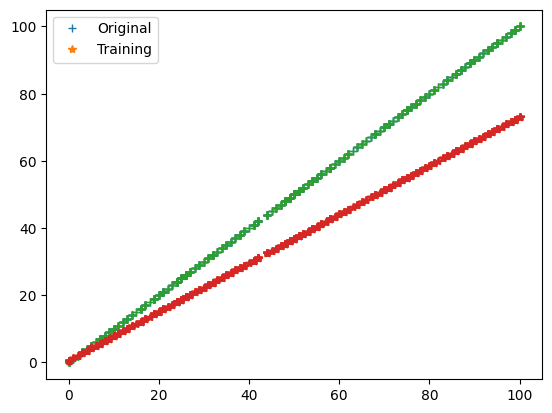

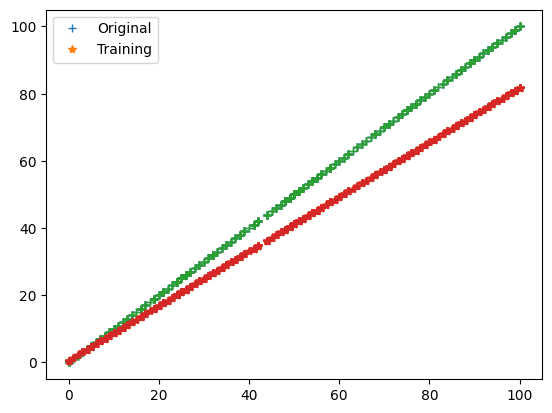

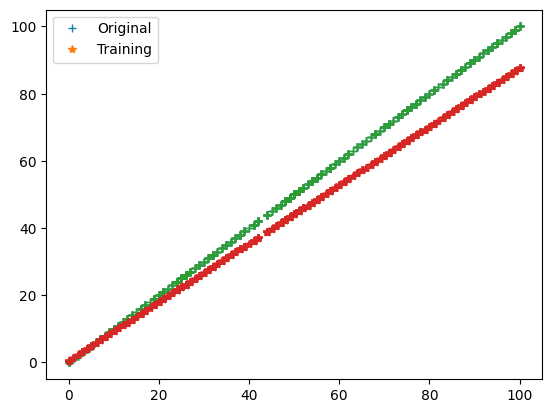

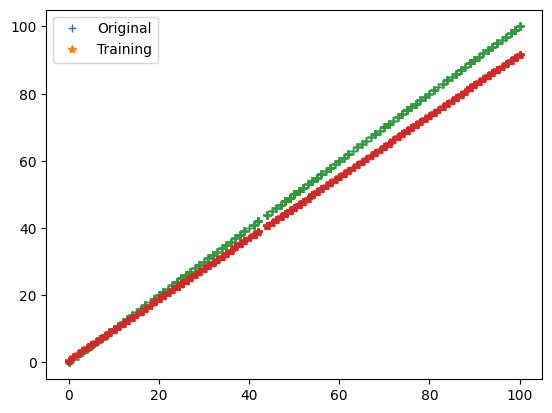

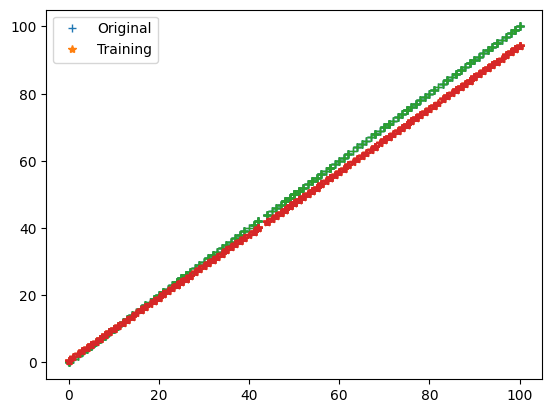

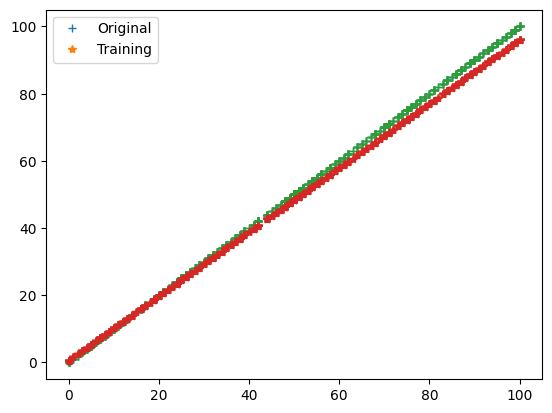

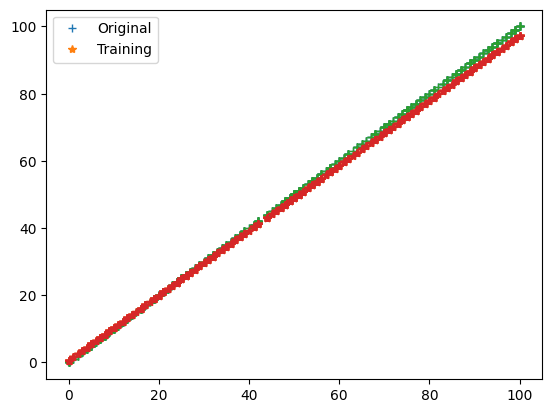

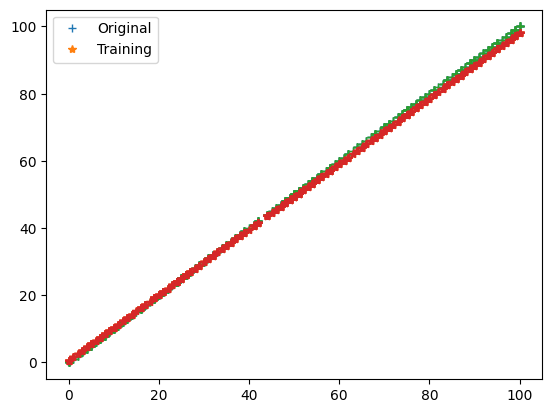

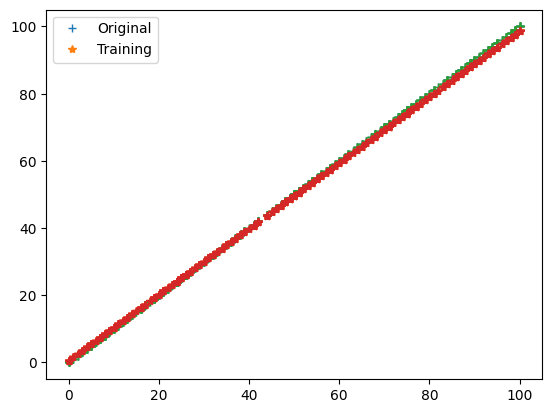

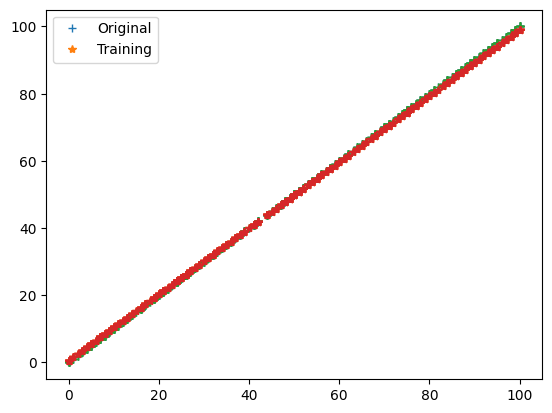

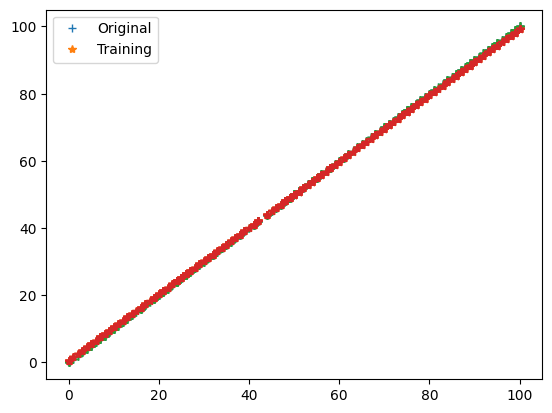

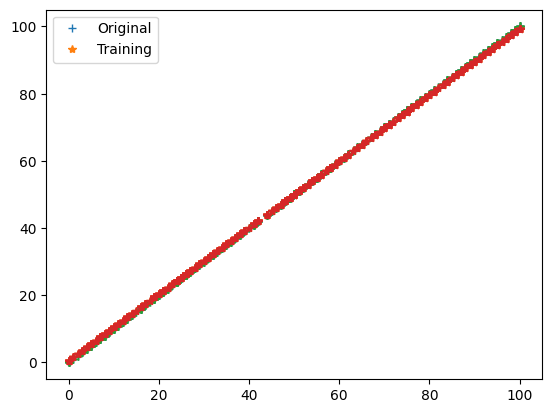

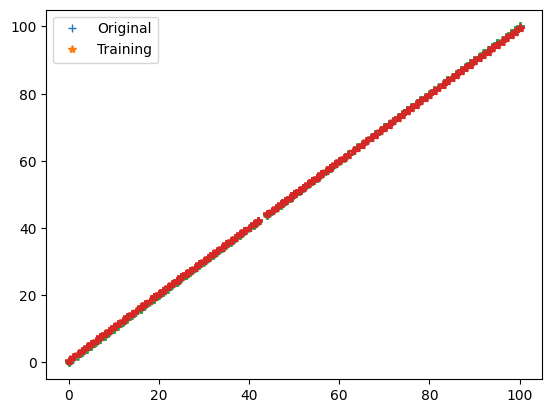

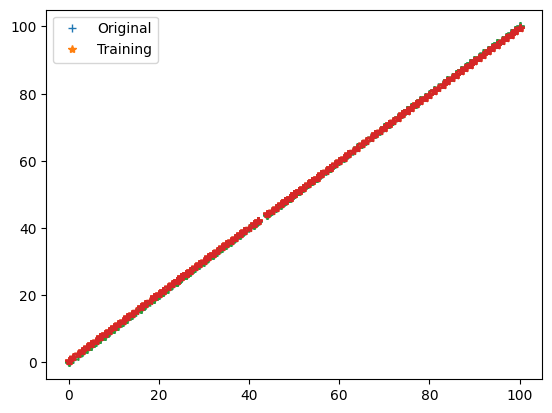

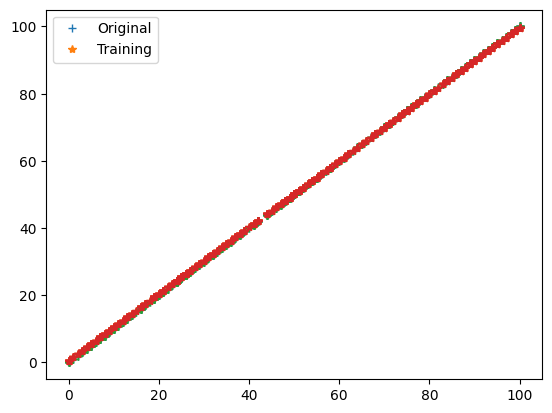

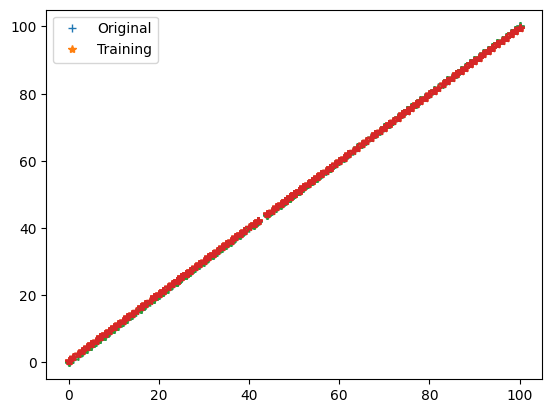

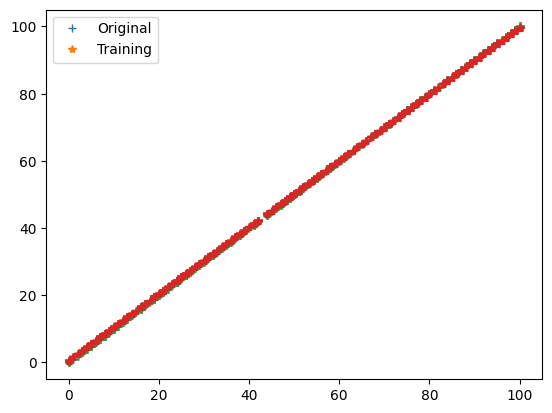

In [ ]:
parameters,loss = train(training_input, training_output,0.0001,20)

In [ ]:
parameters

{'m': 0.9909896373004566, 'c': 0.573779772740878}

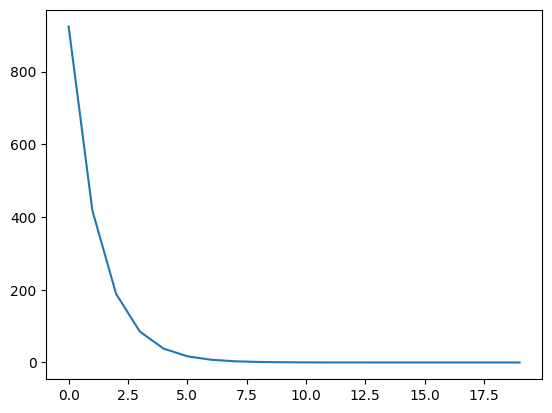

In [ ]:
plt.plot(loss)

<h3><b>Prediction</b></h3>




In [ ]:
test_predictions = val_input * parameters['m'] + parameters['c']

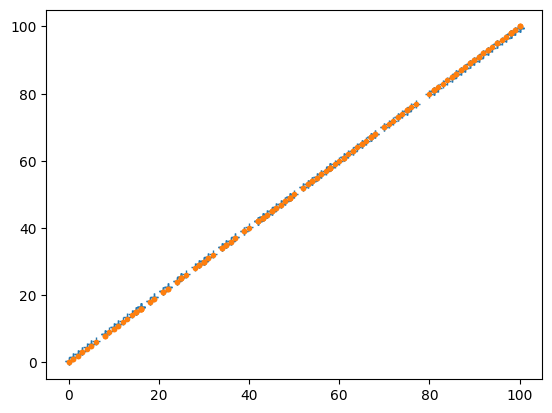

In [ ]:
plt.plot(val_input, test_predictions, "+")
plt.plot(val_input,val_output, ".")
plt.show()

<h3><b>Cost of Prediction</b></h3>




In [ ]:
cost_function(val_output, test_predictions)

0.005989846661983427